## Area preserving Maps (separatrix maps)

\begin{eqnarray}
y_{n+1} &=& y_n + K \sin x_{n} \\
x_{n+1} &=& x_n + {\rm sign} (y_{n+1}) |y_{n+1}|^\gamma \\
\end{eqnarray}

Our state vector [x,y]
with angle $x \in [0,2\pi]$

If $\gamma=1$ then we recover the Standard map but keeping $y \in [0, 2\pi]$.

If $\gamma=1.5$ we have the Kepler map.




In [38]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
%matplotlib inline


In [106]:
twopi=2.0*np.pi

# return an angle within [0,2pi)
def residual(ang):
    z = math.fmod(ang,twopi)
    if (z < 0):
        z = z+ twopi
    return z

# fill a vector with nsteps of the map
# x0,W0 is initial condition
# return a vector for x and a vector for W
# for each step of the map
def n_steps(x0,y0,n,gamma,K):
    xvec = np.zeros(0)
    yvec = np.zeros(0)
    xn = x0
    yn = y0
    xvec = np.append(xvec,x0)
    yvec = np.append(yvec,y0)
    for i in range(n):
        ynplus1 = yn + K*np.sin(xn)
        if (gamma==1.0):  # standard map!!!!
            ynplus1 = residual(ynplus1)
            xnplus1 = xn + ynplus1
        else:
            xnplus1 = xn + np.sign(ynplus1)*np.abs(ynplus1)**gamma  
         
        xnplus1 = residual(xnplus1)
        xvec = np.append(xvec,xnplus1)
        yvec = np.append(yvec,ynplus1)
        xn = xnplus1
        yn = ynplus1
        
    return xvec,yvec

# call previous routine and plot at the same time a single orbit
def plt_nsteps(x0,y0,n,gamma,K,markerstring):
    xvec,yvec = n_steps(x0,y0,n,gamma,K)
    plt.plot(xvec,yvec,markerstring,markersize=1)
    
# plot a bunch of orbits all at once    
def plt_nsteps_series(x0,y0min,dy,norbits,npoints,gamma,K):
    colorstr = ['r.', 'g.', 'b.', 'k.', 'm.', 'c.']
    ncolors=6
    for i in range(norbits):
        y0 = y0min+ dy*i
        plt_nsteps(x0,y0,npoints,gamma,K,markerstring=colorstr[i%ncolors])
        
    

(0, 6.283185307179586)

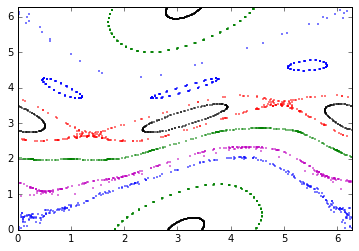

In [99]:
n=300  # number of steps of the map
K=0.9  # parameter for map
gamma=1.0   # standard map
plt_nsteps(0.1,0.3,n,gamma,K,'b.')
plt_nsteps(0.5,2.5,n,gamma,K,'r.')
plt_nsteps(0.5,3.0,n,gamma,K,'k.')
plt_nsteps(4.5,0.8,n,gamma,K,'g.')
plt_nsteps(3.5,0.2,n,gamma,K,'k.')
plt_nsteps(3.5,2.2,n,gamma,K,'m.')
plt_nsteps(3.5,4.2,n,gamma,K,'b.')
plt_nsteps(1.0,2.0,n,gamma,K,'g.')
plt.xlim([0,2.0*np.pi])
plt.ylim([0,2.0*np.pi])


(0, 6.283185307179586)

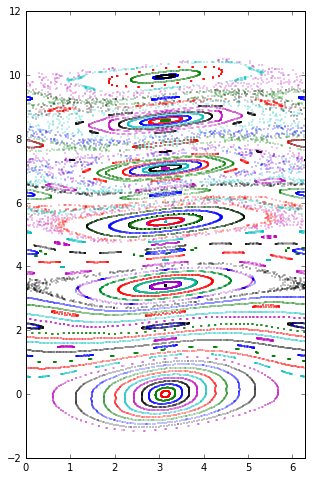

In [108]:
npoints=300  # number of steps of the map
K=0.3  # parameter for map
gamma=1.5   # kepler map
norbits=100
plt.figure(figsize=(5,8))
plt_nsteps_series(3.14,0.1,0.1,norbits,npoints,gamma,K)
plt.xlim([0,2.0*np.pi])

